In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Итерационный метод Якоби

In [2]:
n = 5
eps = 1e-5

In [3]:
np.random.seed(40)

#Задаём положительно определённую матрицу
A = np.zeros((n, n))
for i in range(n):
    A[i][i] = np.random.uniform(100, 200, 1)
C = np.random.randn(n, n)
A = np.dot(np.linalg.inv(C), np.dot(A, C))
print("Матрица:\n", A)

b = np.random.randn(n, 1)
x = np.linalg.solve(A, b)
print("Точное решение:\n", x)

Матрица:
 [[217.5029557  -23.4607199  104.81435639 -18.93284763 -20.68029081]
 [ -9.80821224 140.99443842  -3.07215244   3.41673439 -10.04076683]
 [-37.2122863   10.23790595  87.92795592  19.48732739  10.91652042]
 [ 27.23438673  -4.64775735  40.77526921 129.44422486 -10.70200209]
 [ -4.97912484  -3.31746512   9.67107946  -5.88936192 123.05479684]]
Точное решение:
 [[ 0.00867372]
 [ 0.00451461]
 [-0.01139323]
 [ 0.015695  ]
 [ 0.00789998]]


In [4]:
def solve(A, b, alpha, eps):
    x_approx = np.zeros((n, 1))
    iters = 0
    while np.linalg.norm(alpha * (np.dot(A, x_approx) - b)) > eps:
        x_approx = x_approx - alpha * (np.dot(A, x_approx) - b)
        iters += 1
    return iters, x_approx
    
def solve_iter_fix(A, b, alpha, eps, iters):
    x_approx = np.zeros((n, 1))
    for i in range(iters):
        x_approx = x_approx - alpha * (np.dot(A, x_approx) - b)
    return x_approx

### Число итераций для сходимости в зависимости от $\alpha$:

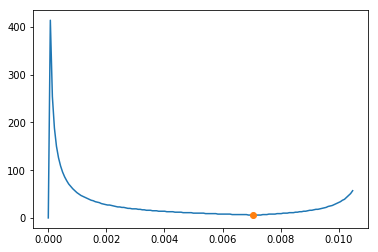

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(A)
eigen_values_abs = np.abs(eigen_values)
m, M = np.min(eigen_values_abs), np.max(eigen_values_abs)
alpha_opt = 2 / (m + M)

alphas = np.arange(0, alpha_opt * 1.5, 0.01 * alpha_opt)
res = []
for alpha in alphas:
    new_res, _ = solve(A, b, alpha, eps)
    res.append(new_res)

plt.figure()
plt.plot(alphas, res)
plt.plot(alpha_opt, solve(A, b, alpha_opt, eps)[0], 'o')
plt.show()

### Зависимость погрешности от $\alpha$ при $iters = 100$:

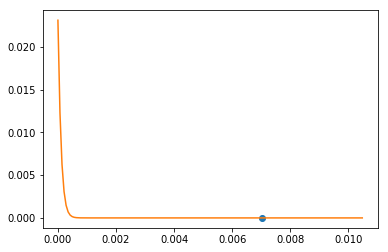

In [9]:
eigen_values, eigen_vectors = np.linalg.eig(A)
eigen_values_abs = np.abs(eigen_values)
m, M = np.min(eigen_values_abs), np.max(eigen_values_abs)
alpha_opt = 2 / (m + M)
iters = 100

res = []
alphas = np.arange(0, alpha_opt * 1.5, 0.01 * alpha_opt)

for alpha in alphas:
    x_approx = solve_iter_fix(A, b, alpha, eps, iters)
    res.append(np.linalg.norm(x_approx - x))

plt.figure()
x_approx = solve_iter_fix(A, b, alpha, eps, iters)
plt.plot(alpha_opt, np.linalg.norm(x_approx - x), 'o')
plt.plot(alphas, res)
plt.show()